In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import datetime

In [3]:
pwd

'C:\\Users\\manth\\Desktop\\POWER_CONSUMPTION_NEW'

In [4]:
dataset=pd.read_csv(r'C:\\Users\\manth\\Desktop\\POWER_CONSUMPTION_NEW\\chandu_one.csv')

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset['Day'] = dataset['Date'].dt.day
dataset.drop(columns=['Date'],axis=1,inplace=True)

C:\Users\manth\AppData\Local\Temp\ipykernel_18436\2663323781.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [6]:
dataset['Time'] = pd.to_datetime(dataset['Time'])
dataset['Hours'] = dataset['Time'].dt.hour
dataset['Minutes'] = dataset['Time'].dt.minute
dataset.drop(columns=['Time'],axis=1,inplace=True)

In [7]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes
0,4.216,0.418,234.84,18.4,0,1,17.0,12,2006,16,17,24
1,5.36,0.436,233.63,23,0,1,16.0,12,2006,16,17,25
2,5.374,0.498,233.29,23,0,2,17.0,12,2006,16,17,26
3,5.388,0.502,233.74,23,0,1,17.0,12,2006,16,17,27
4,3.666,0.528,235.68,15.8,0,1,17.0,12,2006,16,17,28


In [8]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes
1048570,0.426,0.076,242.27,1.8,0,0,0.0,12,2008,13,21,34
1048571,0.424,0.076,242.1,1.8,0,0,0.0,12,2008,13,21,35
1048572,0.422,0.076,241.73,1.8,0,0,0.0,12,2008,13,21,36
1048573,0.422,0.078,242.56,1.8,0,0,0.0,12,2008,13,21,37
1048574,0.422,0.078,242.61,1.8,0,0,0.0,12,2008,13,21,38


In [9]:
print(f"The Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The Dataset has 1048575 rows and 12 columns


In [10]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Month', 'Year', 'Day', 'Hours', 'Minutes'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  object 
 1   Global_reactive_power  1048575 non-null  object 
 2   Voltage                1048575 non-null  object 
 3   Global_intensity       1048575 non-null  object 
 4   Sub_metering_1         1048575 non-null  object 
 5   Sub_metering_2         1048575 non-null  object 
 6   Sub_metering_3         1044506 non-null  float64
 7   Month                  1048575 non-null  int64  
 8   Year                   1048575 non-null  int64  
 9   Day                    1048575 non-null  int64  
 10  Hours                  1048575 non-null  int64  
 11  Minutes                1048575 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 96.0+ MB


In [12]:
dataset.isnull().sum()

Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
Month                       0
Year                        0
Day                         0
Hours                       0
Minutes                     0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  object 
 1   Global_reactive_power  1048575 non-null  object 
 2   Voltage                1048575 non-null  object 
 3   Global_intensity       1048575 non-null  object 
 4   Sub_metering_1         1048575 non-null  object 
 5   Sub_metering_2         1048575 non-null  object 
 6   Sub_metering_3         1044506 non-null  float64
 7   Month                  1048575 non-null  int64  
 8   Year                   1048575 non-null  int64  
 9   Day                    1048575 non-null  int64  
 10  Hours                  1048575 non-null  int64  
 11  Minutes                1048575 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 96.0+ MB


In [14]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
Month                    False
Year                     False
Day                      False
Hours                    False
Minutes                  False
dtype: bool

In [15]:
dataset=dataset.dropna(subset=['Month','Year','Day','Hours','Minutes','Sub_metering_3'])

In [16]:
dataset.isnull().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
Month                    False
Year                     False
Day                      False
Hours                    False
Minutes                  False
dtype: bool

In [17]:
dataset=dataset.dropna(subset=['Month','Year','Day','Hours','Minutes','Sub_metering_3'])

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044506 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1044506 non-null  object 
 1   Global_reactive_power  1044506 non-null  object 
 2   Voltage                1044506 non-null  object 
 3   Global_intensity       1044506 non-null  object 
 4   Sub_metering_1         1044506 non-null  object 
 5   Sub_metering_2         1044506 non-null  object 
 6   Sub_metering_3         1044506 non-null  float64
 7   Month                  1044506 non-null  int64  
 8   Year                   1044506 non-null  int64  
 9   Day                    1044506 non-null  int64  
 10  Hours                  1044506 non-null  int64  
 11  Minutes                1044506 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 103.6+ MB


In [19]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes


In [20]:
dataset.replace('?',np.nan,inplace=True)

In [73]:
dataset=dataset.dropna(how = 'all')

In [74]:
for i in dataset.columns:
    dataset[i]=dataset[i].astype('float64')

In [75]:
dataset.shape

(1044506, 12)

In [76]:
values=dataset.values
dataset['Sub_metering_4']=(values[:,0]*1000/60)*(values[:,4]+values[:,5]+values[:,6])

In [77]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes,Sub_metering_4
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,6.507046e+00,2.007458e+03,1.569586e+01,1.150458e+01,2.949982e+01,3.660963e+02
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,3.442326e+00,5.388726e-01,8.802167e+00,6.923520e+00,1.731770e+01,9.416224e+02
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.007000e+03,8.000000e+00,6.000000e+00,1.500000e+01,0.000000e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.007000e+03,1.600000e+01,1.200000e+01,3.000000e+01,6.633333e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,9.000000e+00,2.008000e+03,2.300000e+01,1.800000e+01,4.400000e+01,4.319333e+02
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,1.200000e+01,2.008000e+03,3.100000e+01,2.300000e+01,5.900000e+01,2.183250e+04


In [78]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year,Day,Hours,Minutes,Sub_metering_4
Global_active_power,1.000000,0.254841,-0.400987,0.999020,0.474129,0.456677,0.624107,0.018482,-0.062093,-0.014709,0.285043,0.002319,0.796370
Global_reactive_power,0.254841,1.000000,-0.120617,0.271843,0.137682,0.150528,0.076274,-0.001750,-0.001672,-0.012848,0.146362,-0.002735,0.191240
Voltage,-0.400987,-0.120617,1.000000,-0.411298,-0.203805,-0.178899,-0.284932,0.059563,0.127268,0.049915,-0.190201,0.011900,-0.324501
Global_intensity,0.999020,0.271843,-0.411298,1.000000,0.478198,0.462192,0.613220,0.016927,-0.063352,-0.015035,0.285852,0.002225,0.799920
Sub_metering_1,0.474129,0.137682,-0.203805,0.478198,1.000000,0.060830,0.115600,-0.002854,-0.008836,-0.004702,0.110560,0.001044,0.638500
Sub_metering_2,0.456677,0.150528,-0.178899,0.462192,0.060830,1.000000,0.106461,-0.005565,-0.032818,-0.001688,0.097508,-0.001282,0.655407
Sub_metering_3,0.624107,0.076274,-0.284932,0.613220,0.115600,0.106461,1.000000,0.015164,0.001677,-0.013135,0.127895,-0.002875,0.438550
Month,0.018482,-0.001750,0.059563,0.016927,-0.002854,-0.005565,0.015164,1.000000,-0.134641,0.013736,-0.000009,-0.000029,0.006512
Year,-0.062093,-0.001672,0.127268,-0.063352,-0.008836,-0.032818,0.001677,-0.134641,1.000000,-0.065280,-0.001835,-0.000127,-0.033901
Day,-0.014709,-0.012848,0.049915,-0.015035,-0.004702,-0.001688,-0.013135,0.013736,-0.065280,1.000000,0.001003,-0.000025,-0.004559


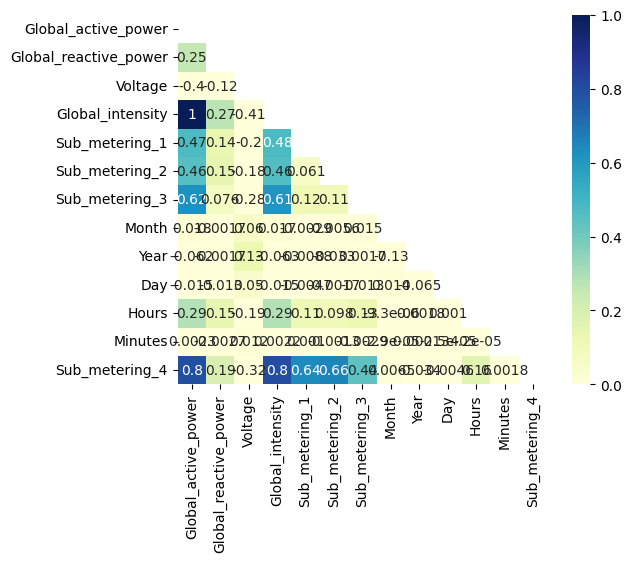

In [79]:
pearson=dataset.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson,vmax=1,vmin=0,square=True,cbar=True,annot=True,cmap="YlGnBu",mask=mask);

C:\Users\manth\AppData\Local\Temp\ipykernel_11304\2072817880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

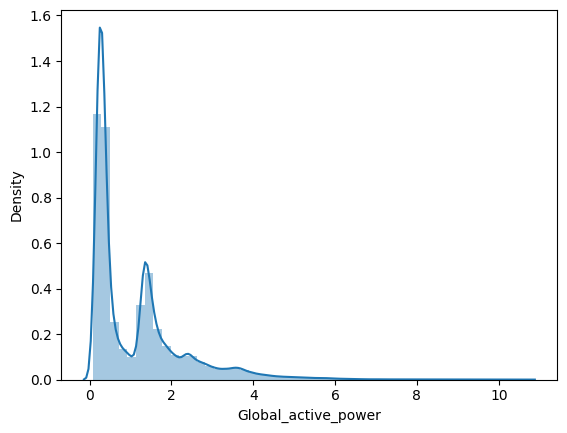

In [80]:
sns.distplot(dataset['Global_active_power'])

C:\Users\manth\AppData\Local\Temp\ipykernel_11304\4209798639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_active_power'],kde=False,bins=30)


<Axes: xlabel='Global_active_power'>

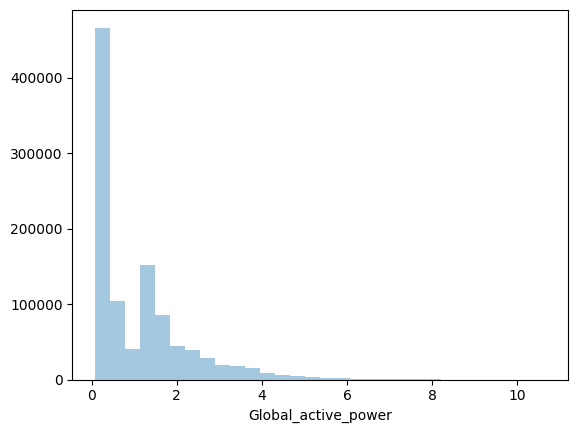

In [81]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

C:\Users\manth\AppData\Local\Temp\ipykernel_11304\666305061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Voltage'],kde=True,bins=30)


<Axes: xlabel='Voltage', ylabel='Density'>

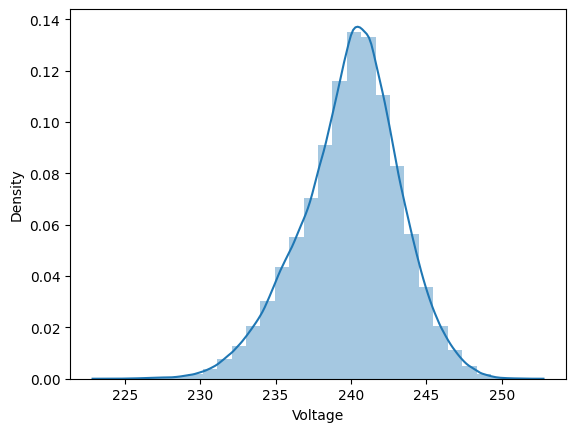

In [82]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

C:\Users\manth\AppData\Local\Temp\ipykernel_11304\1389982641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Global_intensity'],kde=True,bins=30)


<Axes: xlabel='Global_intensity', ylabel='Density'>

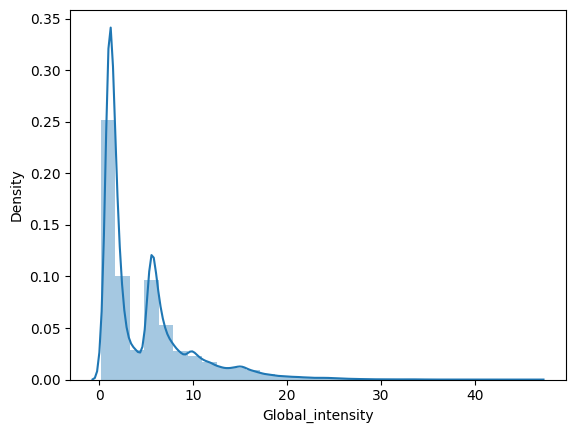

In [83]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

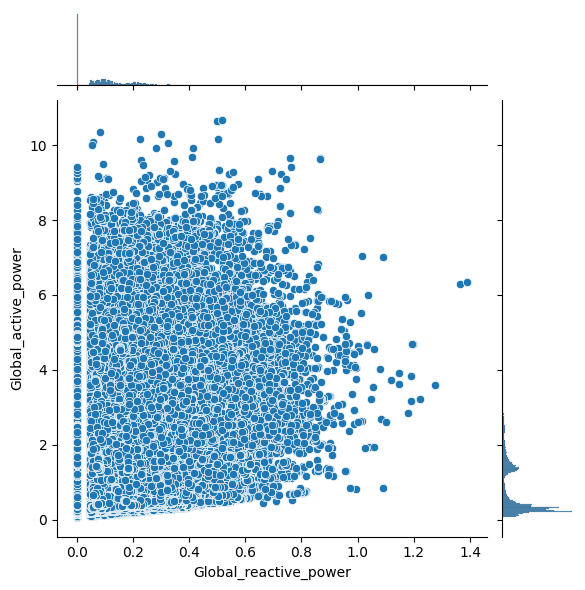

In [84]:
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data=dataset,kind='scatter')

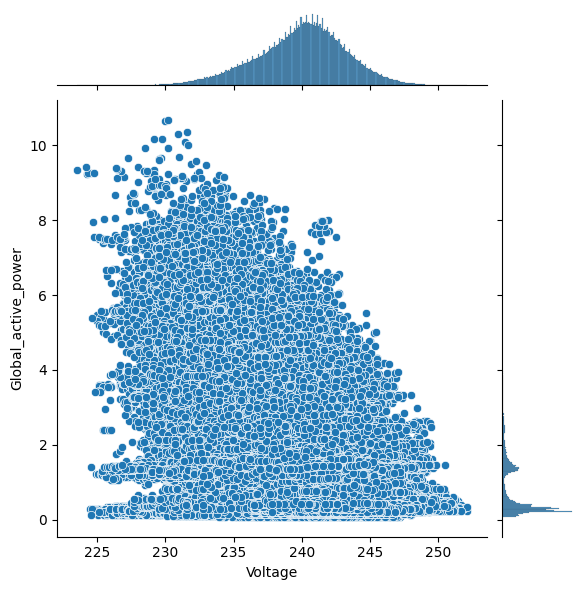

In [85]:
sns.jointplot(x='Voltage',y='Global_active_power',data=dataset,kind='scatter')

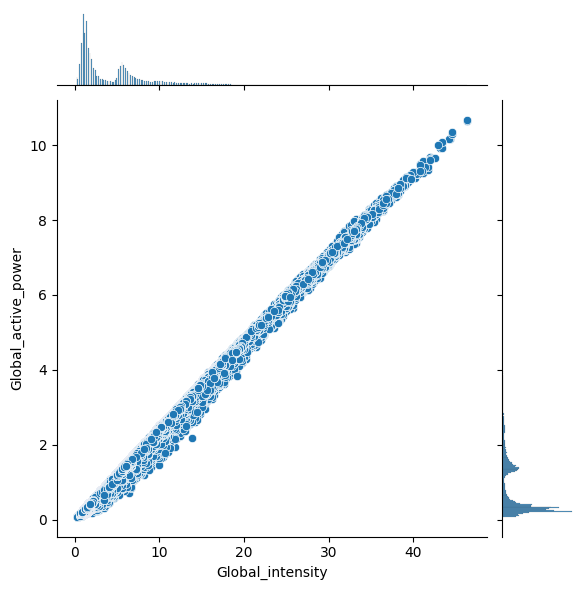

In [86]:
sns.jointplot(x='Global_intensity',y='Global_active_power',data=dataset,kind='scatter')

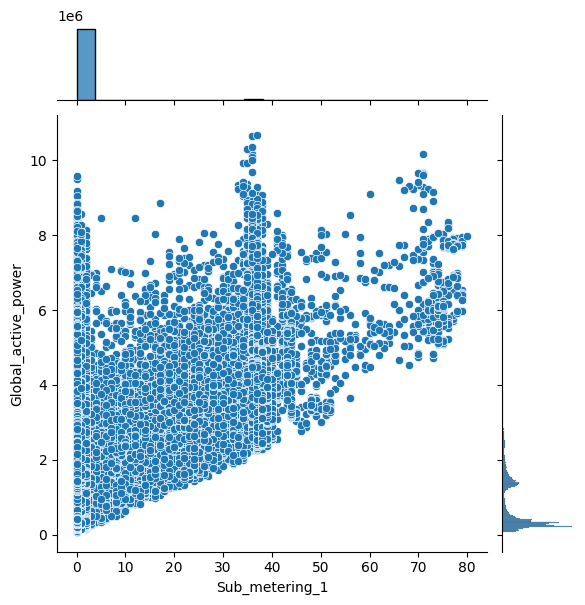

In [87]:
sns.jointplot(x='Sub_metering_1',y='Global_active_power',data=dataset,kind='scatter')

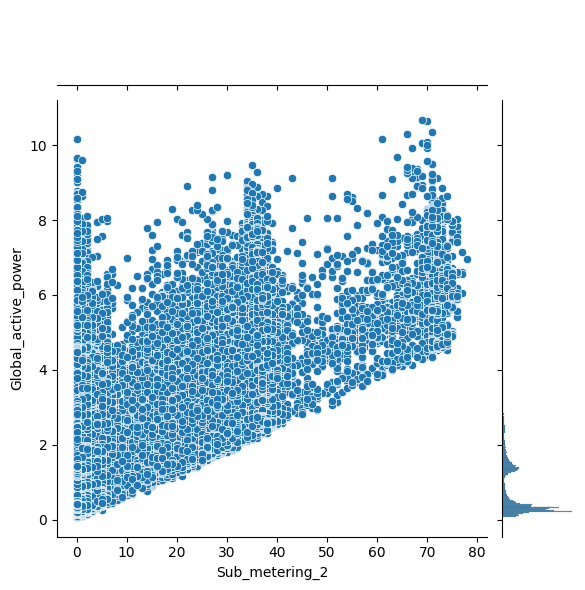

In [88]:
sns.jointplot(x='Sub_metering_2',y='Global_active_power',data=dataset,kind='scatter')

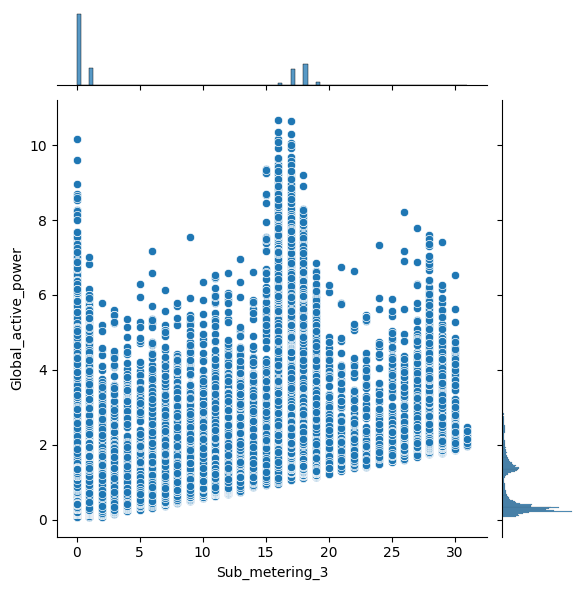

In [89]:
sns.jointplot(x='Sub_metering_3',y='Global_active_power',data=dataset,kind='scatter')

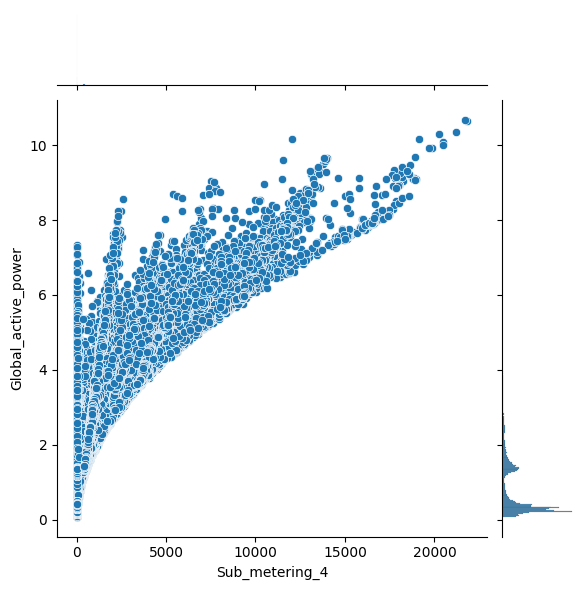

In [90]:
sns.jointplot(x='Sub_metering_4',y='Global_active_power',data=dataset,kind='scatter')

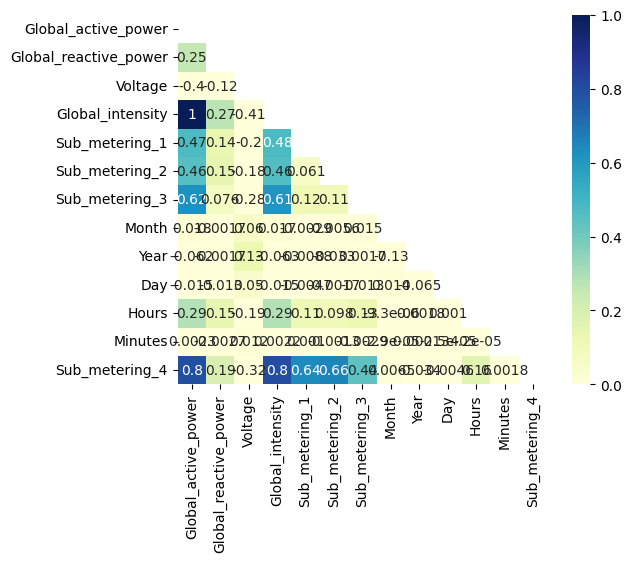

In [91]:
pearson=dataset.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

In [92]:
x=dataset.iloc[:,[1,3,4,5,6]]
y=dataset.iloc[:,0]

In [93]:
x.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,18.4,0.0,1.0,17.0
1,0.436,23.0,0.0,1.0,16.0
2,0.498,23.0,0.0,2.0,17.0
3,0.502,23.0,0.0,1.0,17.0
4,0.528,15.8,0.0,1.0,17.0


In [94]:
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_test, X_train, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=101)

In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313352, 5)
(731154, 5)
(731154,)
(313352,)


In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044506 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1044506 non-null  float64
 1   Global_reactive_power  1044506 non-null  float64
 2   Voltage                1044506 non-null  float64
 3   Global_intensity       1044506 non-null  float64
 4   Sub_metering_1         1044506 non-null  float64
 5   Sub_metering_2         1044506 non-null  float64
 6   Sub_metering_3         1044506 non-null  float64
 7   Month                  1044506 non-null  float64
 8   Year                   1044506 non-null  float64
 9   Day                    1044506 non-null  float64
 10  Hours                  1044506 non-null  float64
 11  Minutes                1044506 non-null  float64
 12  Sub_metering_4         1044506 non-null  float64
dtypes: float64(13)
memory usage: 111.6 MB


In [101]:
from sklearn import model_selection

In [102]:
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

In [103]:
predictions

array([0.27071779, 0.36184344, 2.55270331, ..., 0.24084014, 0.17583119,
       1.17316809])

In [104]:
from xgboost import XGBRegressor
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
model2=XGBRegressor()
model2.fit(X_train,y_train)
y_predict2=model2.predict(X_test)

In [105]:
y_predict2

array([0.28877944, 0.36624503, 2.5779452 , ..., 0.23977445, 0.18445027,
       1.167504  ], dtype=float32)

In [108]:
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_predict1 = model1.predict(X_test)

In [109]:
y_predict1

array([0.29102649, 0.3692354 , 2.5784175 , ..., 0.24468068, 0.18202101,
       1.17428303])

In [110]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=0)
model3=Ridge()
model3.fit(X_train,y_train) 
y_predict3=model3.predict(X_test)


In [111]:
y_predict3

array([0.27071763, 0.36184358, 2.55270466, ..., 0.24083838, 0.17583116,
       1.17316641])

In [112]:
y_pl=lm.predict([[0.48,18.4,0.0,1.0,17.0]])
y_pl

C:\Users\manth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.30309534])

In [113]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSquarevalue:',metrics.r2_score(y_test,predictions))

MAE: 0.028134862704654637
MSE: 0.0019138751580238692
RMSE: 0.04374785889645194
RSquarevalue: 0.9984928401780359


In [114]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict2))
print('MSE:',metrics.mean_squared_error(y_test,y_predict2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict2))

MAE: 0.02095332582116942
MSE: 0.001216732150620442
RMSE: 0.0348816878980998
RSquarevalue: 0.999041834153174


In [115]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict1))
print('MSE:',metrics.mean_squared_error(y_test,y_predict1))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict1))

MAE: 0.0211874622429408
MSE: 0.0013538042515740306
RMSE: 0.036794079028751765
RSquarevalue: 0.9989338910815461


In [116]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict3))
print('MSE:',metrics.mean_squared_error(y_test,y_predict3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict3)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict3))

MAE: 0.02813489369942141
MSE: 0.0019138744815256883
RMSE: 0.043747851164665084
RSquarevalue: 0.9984928407107722


In [117]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(lm,x,y,cv=5)

In [118]:
np.mean(cv)

0.9983821622023535

In [119]:
import pickle
filename='RESOURCE_ENERGY.pkl'
pickle.dump(lm,open(filename,'wb'))